# Extração Geral de Features
    Carregamento do Arquivo
    Contar Palavras
    Contar caracteres
    Media de Caracteres por palavras
    Quantidade de Stop Words
    Quantidade de #hashTags e @Mençoes
    Se existem numeros nos Tweets
    Contagem de Palavras maiusculas

# Processamento e Limpeza
    Transformando em minusculo
    Contrações
    remoção e contagem de e-mails
    remoção e contagem de URL
    remoção de RT
    Remoção de caracteres especiais
    Remoção de multiplos espaços
    Remoção de tags HTML
    Remoção de caracteres acentuados
    Remoção de Stop Words
    Converter em base ou raiz da palavra
    Remoção de palavras comuns
    Remoção de palavras raras
    Word Cloud
    Correção Ortografica
    Tokenização
    Lematização
    Deteção de Entidades Nomeadas (NER)
    Detecção de substantivo
    detecção de idioma
    Tradução de frases
    Usando um classificado de Sentimento   

# Processamento de texto avançado e extração de recursos
    N Gram, Bi Gram
    Bag of Words(Bow)
    Termo de Frequencia das Palavras(TF)
    Frequencia inversa dos documentos (IDF)
    TF IDF
    Word Emmbedding Word2Vec usando SpaCy
    

# Modelos de Aprendizado de Máquina e Classificação de Textos
    SGDClassifier
    LogisticRegression
    LogisticRegressionCV
    LinearSVC
    RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
#df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin1', header=None)
df = pd.read_csv('olid-training-v1.0.tsv', sep='\t', usecols=('tweet','subtask_a'))

In [4]:
df.head()

,tweet,subtask_a
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT


In [5]:
#df = df[[5,0]]
df

,tweet,subtask_a
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT
...,...,...
13235,@USER Sometimes I get strong vibes from people...,OFF
13236,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT
13237,@USER And why report this garbage. We don't g...,OFF
13238,@USER Pussy,OFF


In [6]:
df.columns = ['twitts', 'sentiment']
df.head()

,twitts,sentiment
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT


In [7]:
df['sentiment'].value_counts()

NOT    8840
OFF    4400
Name: sentiment, dtype: int64

In [8]:
import re
sent_map = {0: 'Não Ofensivo', 1: 'Ofensivo'}

### Contando Palavras

In [9]:
df['word_counts']= df['twitts'].apply(lambda x: len(str(x).split()))

In [10]:
df.head()

,twitts,sentiment,word_counts
0,@USER She should ask a few native Americans wh...,OFF,14
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,11
2,Amazon is investigating Chinese employees who ...,NOT,27
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,11
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,12


### Contando Caracteres

In [11]:
df['char_counts']= df['twitts'].apply(lambda x: len(str(x)))

In [12]:
df.head()

,twitts,sentiment,word_counts,char_counts
0,@USER She should ask a few native Americans wh...,OFF,14,71
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,11,67
2,Amazon is investigating Chinese employees who ...,NOT,27,182
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,11,65
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,12,72


### Comprimento médio das palavras

In [13]:
#criando uma função
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [14]:
df['avg_word_len']= df['twitts'].apply(lambda x: get_avg_word_len(x))

In [15]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,@USER She should ask a few native Americans wh...,OFF,14,71,4.142857
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,11,67,5.181818
2,Amazon is investigating Chinese employees who ...,NOT,27,182,5.777778
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,11,65,5.000000
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,12,72,5.083333


In [16]:
115/19

6.052631578947368

### Quantidade de Stop Words

In [17]:
print(STOP_WORDS)

{'namely', 'others', 'nor', 'several', 'into', 'there', 'quite', 'sometime', 'every', 'around', 'six', 'this', 'herself', 'otherwise', 'did', 'sixty', 'who', 'some', 'hers', 'doing', 'up', 'empty', 'upon', 'nevertheless', 'one', 'while', "n't", 'cannot', 'forty', 'such', 'mine', 'regarding', 'during', 'ourselves', 'its', 'n‘t', '‘s', 'take', 'fifteen', 'moreover', 'or', 'about', 'even', '‘d', 'seemed', 'thru', 'beside', 'me', 'last', 'sometimes', 'everything', 'seeming', 'various', 'whom', 'next', 'beyond', 'everywhere', 'latter', 'yourself', 'my', 'is', 'except', 'another', "'s", '’ll', 'do', 'you', "'ve", 'afterwards', 'anywhere', 'being', 'perhaps', 'put', 'already', 'off', 'see', 'per', 'really', 'whole', 'amongst', 'noone', "'d", 'move', 'further', 'hence', 'beforehand', 'together', 'thence', 'always', 'i', 'anything', 'between', 'yet', 'these', 'although', 'front', 'hundred', 'and', 'be', 'get', 'else', 'anyhow', 'all', 'never', 'only', 'whatever', 'nothing', 'then', 'too', 'back

In [18]:
x = 'this is text data'

In [19]:
x.split()

['this', 'is', 'text', 'data']

In [20]:
len([t for t in x.split() if t in STOP_WORDS])

2

In [21]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]) )

In [22]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,@USER She should ask a few native Americans wh...,OFF,14,71,4.142857,8
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,11,67,5.181818,0
2,Amazon is investigating Chinese employees who ...,NOT,27,182,5.777778,8
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,11,65,5.000000,4
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,12,72,5.083333,3


### Quantidade de #HashTag e @Mençoes

In [23]:
x = 'this #hashtag and this is @mention'

In [24]:
x.split()

['this', '#hashtag', 'and', 'this', 'is', '@mention']

In [25]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [26]:
df['hashtags_count']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count']=df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [27]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,@USER She should ask a few native Americans wh...,OFF,14,71,4.142857,8,0,1
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,11,67,5.181818,0,2,3
2,Amazon is investigating Chinese employees who ...,NOT,27,182,5.777778,8,5,0
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,11,65,5.000000,4,0,1
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,12,72,5.083333,3,0,2


### Digitos Numericos presentes no Twitts

In [28]:
df['numeric_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit() ]))

In [29]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count
0,@USER She should ask a few native Americans wh...,OFF,14,71,4.142857,8,0,1,0
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,11,67,5.181818,0,2,3,0
2,Amazon is investigating Chinese employees who ...,NOT,27,182,5.777778,8,5,0,0
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,11,65,5.000000,4,0,1,0
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,12,72,5.083333,3,0,2,0


### Contado letras maiusculas

In [30]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [31]:
df.loc[90]['twitts']

'@USER It\'s easily digestible content.   There\'s no need for nuance or to even understand the story.  They can show a picture of an ANTIFA" and get the base level emotional response their content requires in order to be profitable."'

# Pré-processamento e limpeza

### Conversão para minusculo

In [32]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [33]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
0,@user she should ask a few native americans wh...,OFF,14,71,4.142857,8,0,1,0,1
1,@user @user go home you’re drunk!!! @user #mag...,OFF,11,67,5.181818,0,2,3,0,5
2,amazon is investigating chinese employees who ...,NOT,27,182,5.777778,8,5,0,0,5
3,"@user someone should'vetaken"" this piece of sh...",OFF,11,65,5.000000,4,0,1,0,1
4,@user @user obama wanted liberals &amp; illega...,NOT,12,72,5.083333,3,0,2,0,2


### Contrações

In [34]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn1t've": "could not have", 
"didn1t": "did not",
"doesn't": "does not",
"don’t": "do not",
"hadn't": "had not",
"hadn't've": "had not have", 
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'111ve": "he will have",
"he1s": "he is",
"how'd": "how did",
"howd'y": "how do you",
"i'll've":"I will have",
"i'd":"i Would",
"i'm":"i am",
"i've":"i have",
"isn't": "is not",
"it'd": "it would",
"it'd,ve": "it would have",
"let's":"let us",
"ma'am": "madam",
"mayrTt": "may not",
"mighfve": "might have",
"mightn1t": "might not",
"mightn't've": "might not have", 
"musfve": "must have",
"mustn't": "must not",
"mustn't’ve": "must not have",
"needn't": "need not",
"needn't’ve": "need not have",
"o'clock": "of ^he clock", 
"oughtn't": "ought not",
"oughtn1t've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not"
}

In [35]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [36]:
x = "hi, i'd be happy"

In [37]:
cont_to_exp(x)

'hi, i Would be happy'

In [38]:
%%time
df['twitts']=df['twitts'].apply(lambda x: cont_to_exp(x))

Wall time: 167 ms


In [39]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
0,@user she should ask a few native americans wh...,OFF,14,71,4.142857,8,0,1,0,1
1,@user @user go home you’re drunk!!! @user #mag...,OFF,11,67,5.181818,0,2,3,0,5
2,amazon is investigating chinese employees who ...,NOT,27,182,5.777778,8,5,0,0,5
3,"@user someone should havetaken"" this piece of ...",OFF,11,65,5.000000,4,0,1,0,1
4,@user @user obama wanted liberals &amp; illega...,NOT,12,72,5.083333,3,0,2,0,2


### Quantidade de E-mail e remoção deles

In [40]:
import re

In [41]:
x = 'hi my email me at email@email.com, outro@gmail.com'

In [42]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9]+\.[a-zA-Z0-9_-]+)',x)

['email@email.com', 'outro@gmail.com']

In [43]:
df['emails']=df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9]+\.[a-zA-Z0-9_-]+)',x))

In [44]:
df['emails_count']=df['emails'].apply(lambda x: len(x))

In [45]:
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count


In [46]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9]+\.[a-zA-Z0-9_-]+)','', x)

'hi my email me at , '

In [47]:
df['twitts']=df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9]+\.[a-zA-Z0-9_-]+)','', x))

In [48]:
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count


### Quantidade de URL e remoção delas

In [49]:
x = 'hi, to watch more visit https://youtube.com/kgptalkie'

In [50]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [51]:
df['urls_flag']=df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [52]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x)

'hi, to watch more visit '

In [53]:
df['twitts']=df['twitts'].apply(lambda x:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x))

In [54]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,@user she should ask a few native americans wh...,OFF,14,71,4.142857,8,0,1,0,1,[],0,0
1,@user @user go home you’re drunk!!! @user #mag...,OFF,11,67,5.181818,0,2,3,0,5,[],0,0
2,amazon is investigating chinese employees who ...,NOT,27,182,5.777778,8,5,0,0,5,[],0,0
3,"@user someone should havetaken"" this piece of ...",OFF,11,65,5.000000,4,0,1,0,1,[],0,0
4,@user @user obama wanted liberals &amp; illega...,NOT,12,72,5.083333,3,0,2,0,2,[],0,0


In [55]:
df.loc[0]['twitts']

'@user she should ask a few native americans what their take on this is.'

### Remove RT

In [56]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))

In [57]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,@user she should ask a few native americans wh...,OFF,14,71,4.142857,8,0,1,0,1,[],0,0
1,@user @user go home you’re drunk!!! @user #mag...,OFF,11,67,5.181818,0,2,3,0,5,[],0,0
2,amazon is investigating chinese employees who ...,NOT,27,182,5.777778,8,5,0,0,5,[],0,0
3,"@user someone should havetaken"" this piece of ...",OFF,11,65,5.000000,4,0,1,0,1,[],0,0
4,@user @user obama wanted liberals &amp; illega...,NOT,12,72,5.083333,3,0,2,0,2,[],0,0


### Removendo caracteres especiais

In [58]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+','', x))

In [59]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,user she should ask a few native americans wha...,OFF,14,71,4.142857,8,0,1,0,1,[],0,0
1,user user go home youre drunk user maga trump2...,OFF,11,67,5.181818,0,2,3,0,5,[],0,0
2,amazon is investigating chinese employees who ...,NOT,27,182,5.777778,8,5,0,0,5,[],0,0
3,user someone should havetaken this piece of sh...,OFF,11,65,5.000000,4,0,1,0,1,[],0,0
4,user user obama wanted liberals amp illegals t...,NOT,12,72,5.083333,3,0,2,0,2,[],0,0


### Removendo multiplos espaços   
    "hi         hello        "

In [60]:
x = 'Thanks     for    watching      and please     like this     video'

In [61]:
" ".join(x.split())

'Thanks for watching and please like this video'

In [62]:
df['twitts'] = df['twitts'].apply(lambda x:" ".join(x.split()))

In [63]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,user she should ask a few native americans wha...,OFF,14,71,4.142857,8,0,1,0,1,[],0,0
1,user user go home youre drunk user maga trump2...,OFF,11,67,5.181818,0,2,3,0,5,[],0,0
2,amazon is investigating chinese employees who ...,NOT,27,182,5.777778,8,5,0,0,5,[],0,0
3,user someone should havetaken this piece of sh...,OFF,11,65,5.000000,4,0,1,0,1,[],0,0
4,user user obama wanted liberals amp illegals t...,NOT,12,72,5.083333,3,0,2,0,2,[],0,0


### Removendo tags HTML

In [64]:
from bs4 import BeautifulSoup

In [65]:
x = '<html><h2> Thanks for watching</h2></html>'

In [66]:
BeautifulSoup(x,'lxml').get_text()

' Thanks for watching'

In [67]:
%%time
df['twitts']=df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

Wall time: 1.98 s


### Removendo acentos

In [68]:
import unicodedata
from unicodedata import normalize

In [69]:
x = 'Áccentêd text'

In [70]:
#Voltar a forma normal formulário para a seqüência de caracteres Unicode UNISTR .
#Os valores válidos para o formulário são 'NFC', 'NFKC', 'NFD' e 'NFKD'.

def remove_accented_chars(x):
   # x = unicodedata.normalize('NFKC', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    x = unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII')
    return x

In [71]:
remove_accented_chars(x)
#print(x)

'Accented text'

### SpaCy e NLP

## Remome Stop Words

In [72]:
import spacy

In [73]:
x = 'this is stop words removal code is a the an how what'

In [74]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [75]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [76]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,user ask native americans,OFF,14,71,4.142857,8,0,1,0,1,[],0,0
1,user user home youre drunk user maga trump2020...,OFF,11,67,5.181818,0,2,3,0,5,[],0,0
2,amazon investigating chinese employees selling...,NOT,27,182,5.777778,8,5,0,0,5,[],0,0
3,user havetaken piece shit volcano,OFF,11,65,5.000000,4,0,1,0,1,[],0,0
4,user user obama wanted liberals amp illegals r...,NOT,12,72,5.083333,3,0,2,0,2,[],0,0


### Converter em base ou raiz da palavra

In [77]:
nlp = spacy.load('en_core_web_sm')

C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [78]:
x = 'Kenichan dived times ball managed save 50 rest'

In [79]:
# dive = dived, time = times, manage = managed

In [80]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [81]:
make_to_base(x)

Kenichan dive time ball manage save 50 rest


### Removendo Palavras comuns

In [82]:
' '.join(df.head()['twitts'])

'user ask native americans user user home youre drunk user maga trump2020 url amazon investigating chinese employees selling internal data third-party sellers looking edge competitive marketplace url amazon maga kag china tcot user havetaken piece shit volcano user user obama wanted liberals amp illegals red states'

In [83]:
text = ' '.join(df['twitts'])

In [84]:
text = text.split()

In [85]:
freq_comm = pd.Series(text).value_counts()

In [86]:
f20 = freq_comm[:20]

In [87]:
f20

user             33391
url               2056
liberals          1396
gun               1363
control           1213
antifa            1149
like              1100
maga              1004
conservatives      947
people             897
amp                636
know               634
dont               599
trump              597
bebecause          588
think              554
good               459
right              452
thats              402
time               388
dtype: int64

In [88]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

### Removendo Palavras raras

In [89]:
rare20 = freq_comm[-20:]

In [90]:
rare20

sooooooooo               1
bampb                    1
retconned                1
swedes                   1
refund                   1
coherent                 1
mannerisms               1
shootings-must           1
tanks                    1
spitting                 1
groveled                 1
fascisme                 1
fat-shame                1
amendmentcampus          1
cumm                     1
courtmondaymotivation    1
progress                 1
nellie                   1
placate                  1
unto                     1
dtype: int64

In [91]:
rare = freq_comm[freq_comm.values ==1]

In [92]:
rare

radicalized              1
influx                   1
stakes                   1
guaranteed               1
blairite                 1
                        ..
courtmondaymotivation    1
progress                 1
nellie                   1
placate                  1
unto                     1
Length: 11945, dtype: int64

In [93]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare]))

In [94]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,ask native americans,OFF,14,71,4.142857,8,0,1,0,1,[],0,0
1,home youre drunk trump2020,OFF,11,67,5.181818,0,2,3,0,5,[],0,0
2,amazon investigating chinese employees selling...,NOT,27,182,5.777778,8,5,0,0,5,[],0,0
3,piece shit,OFF,11,65,5.000000,4,0,1,0,1,[],0,0
4,obama wanted illegals red states,NOT,12,72,5.083333,3,0,2,0,2,[],0,0


### Word Cloud Visualization

In [95]:
import wordcloud

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
text

['user',
 'ask',
 'native',
 'americans',
 'user',
 'user',
 'home',
 'youre',
 'drunk',
 'user',
 'maga',
 'trump2020',
 'url',
 'amazon',
 'investigating',
 'chinese',
 'employees',
 'selling',
 'internal',
 'data',
 'third-party',
 'sellers',
 'looking',
 'edge',
 'competitive',
 'marketplace',
 'url',
 'amazon',
 'maga',
 'kag',
 'china',
 'tcot',
 'user',
 'havetaken',
 'piece',
 'shit',
 'volcano',
 'user',
 'user',
 'obama',
 'wanted',
 'liberals',
 'amp',
 'illegals',
 'red',
 'states',
 'user',
 'liberals',
 'kookoo',
 'user',
 'user',
 'oh',
 'noes',
 'tough',
 'shit',
 'user',
 'literally',
 'talking',
 'lol',
 'mass',
 'shootings',
 'like',
 'set',
 'ups',
 'propaganda',
 'divide',
 'major',
 'issues',
 'like',
 'gun',
 'control',
 'terrorism',
 'user',
 'buy',
 'icecream',
 'user',
 'canada',
 'doesnt',
 'need',
 'cuck',
 'looneyleft',
 'liberals',
 'fking',
 'great',
 'country',
 'qproofs',
 'trudeaumustgo',
 'user',
 'user',
 'user',
 'fault',
 'support',
 'gun',
 'contr

In [98]:
x = ' '.join(text[:2000])

In [99]:
len(text)

160629

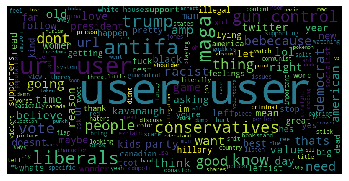

In [100]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Correção Ortografica

In [101]:
from textblob import TextBlob

In [102]:
x = 'Thanks forr waching this vidio carri'

In [103]:
x = TextBlob(x).correct()

In [104]:
x

TextBlob("Thanks for watching this video carry")

### Tokenização

In [105]:
x = 'thanks#watching this video. please like it'

In [106]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [107]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


### Lematização

In [108]:
x = 'runs run running ran'

In [109]:
from textblob import Word

In [110]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [111]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


### Detecção de Entidades NER (usando SpaCy)

In [112]:
x = "Breaking News: Donald Trump, the presindent od the USA is looking to sign a deal to mine the moon"

In [113]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [114]:
from spacy import displacy

In [115]:
displacy.render(doc, style='ent')

### Detectando Substantivos

In [116]:
x

'Breaking News: Donald Trump, the presindent od the USA is looking to sign a deal to mine the moon'

In [117]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the presindent
the USA
a deal
the moon


### Tradução e detecção de linguagem

In [118]:
tb = TextBlob(x)

In [119]:
tb.detect_language()

'en'

In [120]:
tb.translate(to='pt')

TextBlob("Notícias recentes: Donald Trump, o presidente dos EUA quer assinar um acordo para minar a lua")

### Classificando Sentimentos Texto

In [121]:
from textblob.sentiments import NaiveBayesAnalyzer

In [122]:
x = 'we all stands together fo fight with corona virus. we will win toghether '

In [123]:
x

'we all stands together fo fight with corona virus. we will win toghether '

In [124]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [125]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.6127231835676454, p_neg=0.3872768164323548)

In [126]:
x = 'we all are sufering from corona'

In [127]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [128]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.75616044472398, p_neg=0.2438395552760203)

### Processamento de Texto Avançado

### N-Grams

In [129]:
x = 'thanks for watching'

In [130]:
tb = TextBlob(x)

In [131]:
#tb.ngrams(1)
tb.ngrams(2)
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching'])]

### Bag Of Words (BoW)

In [132]:
x = ['this is first sentence', 'this is second','this is last']

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [135]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [136]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [137]:
bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [138]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [139]:
x

['this is first sentence', 'this is second', 'this is last']

### Frequencia dos Termos

In [140]:
#A frequência de termo é simplesmente a razão entre a contagem de uma
#palavra presente em um setença e o comprimento da frase

In [141]:
x

['this is first sentence', 'this is second', 'this is last']

In [142]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [143]:
bow.shape

(3, 6)

In [144]:
tf = bow.copy()

In [145]:
tf

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [146]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col] = tf.loc[index, col]/sum(row[1].values)

In [147]:
tf

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


### Frequencia invesa do documento

idf = log((1+N)/(n+1))+1 usando sklearn when smooth_idf = True

#onde, "N" é o número total de linhas, "n" é o número de linhas em que a palavra estava presente.

In [148]:
import numpy as np

In [149]:
x_df=pd.DataFrame(x, columns=['words'])

In [150]:
x_df

,words
0,this is first sentence
1,this is second
2,this is last


In [151]:
N = bow.shape[0]
N

3

In [152]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [153]:
bb['is'].sum()

3

In [154]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [155]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [156]:
nz

[1, 3, 1, 1, 1, 3]

In [157]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1))+1)

In [158]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [159]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


### TFIDF

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [161]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [162]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [163]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [164]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### Word Embeddings

#### SpaCy Word2Vec

In [165]:
#!python -m spacy download en_core_web_lg
#!pip3 install -U spacy
#spacy.load('en_core_web_lg')
#nlp = spacy.load('en_core_web_lg')

# import en_core_web_lg 
# nlp=spacy.load(en_core_web_lg)

import en_core_web_lg
nlp = en_core_web_lg.load()

In [166]:
doc = nlp('thank you! dog cat lion dfasaa')

In [167]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfasaa False


In [168]:
token.vector.shape

(300,)

In [169]:
nlp('cat').vector.shape

(300,)

In [170]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

thank thank 1.0
thank you 0.5647585
thank ! 0.52147406
thank dog 0.2504265
thank cat 0.20648485
thank lion 0.13629764
thank dfasaa 0.0
you thank 0.5647585
you you 1.0
you ! 0.4390223
you dog 0.36494097
you cat 0.3080798
you lion 0.20392051
you dfasaa 0.0
! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852203
! cat 0.29702348
! lion 0.19601382
! dfasaa 0.0
dog thank 0.2504265
dog you 0.36494097
dog ! 0.29852203
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog dfasaa 0.0
cat thank 0.20648485
cat you 0.3080798
cat ! 0.29702348
cat dog 0.80168545
cat cat 1.0
cat lion 0.52654374
cat dfasaa 0.0
lion thank 0.13629764
lion you 0.20392051
lion ! 0.19601382
lion dog 0.47424486
lion cat 0.52654374
lion lion 1.0
lion dfasaa 0.0
dfasaa thank 0.0
dfasaa you 0.0
dfasaa ! 0.0
dfasaa dog 0.0
dfasaa cat 0.0
dfasaa lion 0.0
dfasaa dfasaa 1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  This is separate from the ipykernel package so we can avoid doing imports until


### Modelos de aprendizado de maquina para classificação de texto

### Bow

In [171]:
df.shape

(13240, 13)

In [172]:
df

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,ask native americans,OFF,14,71,4.142857,8,0,1,0,1,[],0,0
1,home youre drunk trump2020,OFF,11,67,5.181818,0,2,3,0,5,[],0,0
2,amazon investigating chinese employees selling...,NOT,27,182,5.777778,8,5,0,0,5,[],0,0
3,piece shit,OFF,11,65,5.000000,4,0,1,0,1,[],0,0
4,obama wanted illegals red states,NOT,12,72,5.083333,3,0,2,0,2,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,strong vibes mans vibe millions murders - dang...,OFF,25,129,4.200000,11,0,1,0,3,[],0,0
13236,shabby summer,NOT,12,62,3.916667,3,0,0,0,0,[],0,0
13237,report garbage crap,OFF,11,57,4.181818,4,0,1,0,1,[],0,0
13238,pussy,OFF,2,11,5.000000,0,0,1,0,1,[],0,0


In [173]:
df_off = df[df['sentiment']=='OFF']
df_not = df[df['sentiment']=='NOT']

df_not['target']=0
df_off['target']=1

#df0 = df[df['sentiment']==0].sample(200)
#df4 = df[df['sentiment']==1].sample(2000)

df_not

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag,target
2,amazon investigating chinese employees selling...,NOT,27,182,5.777778,8,5,0,0,5,[],0,0,0
4,obama wanted illegals red states,NOT,12,72,5.083333,3,0,2,0,2,[],0,0,0
8,buy,NOT,4,26,5.750000,1,0,1,0,1,[],0,0,0
10,fault support,NOT,11,59,4.454545,3,0,3,0,3,[],0,0,0
11,whats difference kavanaugh men admitted gropin...,NOT,40,279,5.825000,13,9,2,1,5,[],0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13232,light tree,NOT,10,49,4.000000,5,0,1,0,1,[],0,0,0
13233,mad tired,NOT,16,68,3.312500,9,0,1,0,2,[],0,0,0
13234,retweet complete followed patriots,NOT,52,329,5.346154,1,0,46,0,46,[],0,0,0
13236,shabby summer,NOT,12,62,3.916667,3,0,0,0,0,[],0,0,0


In [174]:
df_off

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag,target
0,ask native americans,OFF,14,71,4.142857,8,0,1,0,1,[],0,0,1
1,home youre drunk trump2020,OFF,11,67,5.181818,0,2,3,0,5,[],0,0,1
3,piece shit,OFF,11,65,5.000000,4,0,1,0,1,[],0,0,1
5,,OFF,6,33,4.666667,2,0,1,0,1,[],0,0,1
6,oh tough shit,OFF,6,32,4.500000,0,0,2,0,2,[],0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13223,advocating human rights terrorists human kill ...,OFF,48,275,4.750000,19,0,1,0,3,[],0,0,1
13227,liars twins vigorously defend,OFF,12,74,5.250000,2,0,4,0,4,[],0,0,1
13235,strong vibes mans vibe millions murders - dang...,OFF,25,129,4.200000,11,0,1,0,3,[],0,0,1
13237,report garbage crap,OFF,11,57,4.181818,4,0,1,0,1,[],0,0,1


In [175]:
dfr = df_not.append(df_off)

In [176]:
dfr.shape

(13240, 14)

In [177]:
dfr_feat = dfr.drop(labels=['twitts', 'sentiment','emails'], axis=1).reset_index(drop=True)

In [178]:
dfr_feat['target']

0        0
1        0
2        0
3        0
4        0
        ..
13235    1
13236    1
13237    1
13238    1
13239    1
Name: target, Length: 13240, dtype: int64

In [179]:
y = dfr['target']

In [180]:
y

2        0
4        0
8        0
10       0
11       0
        ..
13223    1
13227    1
13235    1
13237    1
13238    1
Name: target, Length: 13240, dtype: int64

In [181]:
from sklearn.feature_extraction.text import CountVectorizer

In [182]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])

In [183]:
text_counts
text_counts.toarray().shape
#mais de 8 mil colunas, apos a vetorização

(13240, 8654)

In [184]:
dfr_bow = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [185]:
dfr_bow

,005,08,09,090818,10,100,1000,100s,101,10th,...,zealand,zealots,zero,zim,zimmerman,zionists,zombie,zone,zones,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Algoritimos de Machine Learning

In [186]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [187]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(3)
gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
mlp = MLPClassifier(alpha=1, max_iter=1000)
ada = AdaBoostClassifier()
gau = GaussianNB()
qda = QuadraticDiscriminantAnalysis()

In [188]:
clf = {'SGDClassifier':sgd,
       'LogisticRegression':lgr,
       'LogisticRegressionCV':lgrcv,
       'LinearSVC': svm,
       'RandomForestClassifier':rfc,
       'DecisionTreeClassifier': dtc,
       'KNeighborsClassifier':knn,
       'GaussianProcessClassifier':gpc,
       'MLPClassifier':mlp,
       'AdaBoostClassifier':ada,
       'GaussianNB':gau,
       'QuadraticDiscriminantAnalysis':qda
      }

In [189]:
clf.keys()

dict_keys(['SGDClassifier', 'LogisticRegression', 'LogisticRegressionCV', 'LinearSVC', 'RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianProcessClassifier', 'MLPClassifier', 'AdaBoostClassifier', 'GaussianNB', 'QuadraticDiscriminantAnalysis'])

In [190]:
def classify(X,y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify =y)
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(x_test)
        ac = accuracy_score(y_test, y_pred)
        print(key,'---->',ac)

In [191]:
%%time
classify(dfr_bow,y)

SGDClassifier ----> 0.7488670694864048
LogisticRegression ----> 0.7598187311178247
LogisticRegressionCV ----> 0.7533987915407855


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC ----> 0.7341389728096677
RandomForestClassifier ----> 0.7620845921450151
DecisionTreeClassifier ----> 0.7137462235649547
KNeighborsClassifier ----> 0.7050604229607251
GaussianProcessClassifier ----> 0.7613293051359517
MLPClassifier ----> 0.7488670694864048
AdaBoostClassifier ----> 0.7711480362537765
GaussianNB ----> 0.4811178247734139


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis ----> 0.4316465256797583
Wall time: 3h 22min 44s


#### Features Manuais

In [192]:
dfr_feat.head(2)

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails_count,urls_flag,target
0,27,182,5.777778,8,5,0,0,5,0,0,0
1,12,72,5.083333,3,0,2,0,2,0,0,0


In [193]:
%%time
classify(dfr_feat,y)

SGDClassifier ----> 1.0
LogisticRegression ----> 1.0
LogisticRegressionCV ----> 1.0
LinearSVC ----> 1.0
RandomForestClassifier ----> 1.0
DecisionTreeClassifier ----> 1.0
KNeighborsClassifier ----> 1.0
GaussianProcessClassifier ----> 1.0
MLPClassifier ----> 1.0
AdaBoostClassifier ----> 1.0
GaussianNB ----> 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis ----> 0.6676737160120846
Wall time: 1h 20min 1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


#### Manual + Bow

In [194]:
#X  = dfr_feat.join (dfr_bow)
X  = dfr_feat.join (dfr_bow, lsuffix = 'abbv') 

In [195]:
%%time
classify(X,y)

SGDClassifier ----> 1.0
LogisticRegression ----> 1.0
LogisticRegressionCV ----> 1.0
LinearSVC ----> 1.0
RandomForestClassifier ----> 1.0
DecisionTreeClassifier ----> 1.0
KNeighborsClassifier ----> 0.9954682779456193
GaussianProcessClassifier ----> 1.0
MLPClassifier ----> 1.0
AdaBoostClassifier ----> 1.0
GaussianNB ----> 0.9165407854984894


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis ----> 0.9901812688821753
Wall time: 5h 5min 4s


#### TFIDF

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [197]:
dfr.shape

(13240, 14)

In [198]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['twitts'])

In [ ]:
%%time
classify(pd.DataFrame(X.toarray()),y)

SGDClassifier ----> 0.7462235649546828
LogisticRegression ----> 0.7537764350453172
LogisticRegressionCV ----> 0.7424471299093656
LinearSVC ----> 0.720166163141994
RandomForestClassifier ----> 0.773036253776435
DecisionTreeClassifier ----> 0.7129909365558912
KNeighborsClassifier ----> 0.677870090634441


### Word2Vec

In [ ]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1,-1)

In [ ]:
%%time
dfr['vec'] = dfr['twitts'].apply(lambda x:get_vec(x))

In [ ]:
X = np.concatenate(dfr['vec'].to_numpy(), axis=0)

In [ ]:
X.shape

In [ ]:
%%time
classify(pd.DataFrame(X),y)

In [ ]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key,"--->", y_pred)

In [ ]:
predict_w2v('hi thanks for watching this video. please like')

In [ ]:
predict_w2v('please let me know if you wan more video')

In [ ]:
predict_w2v('we stand together, we will win together')

In [ ]:
predict_w2v('congratulation, i am looking good, congrats')

In [ ]:
#Avaliando o Dataset A
#%%time
df_taska = pd.read_csv('testset-levela.tsv', sep='\t')
df_taska['resultado']= df_taska['tweet'].apply(lambda x:predict_w2v(x))


In [ ]:
#Avaliando o Dataset B
#%%time
df_taskb = pd.read_csv('testset-levelb.tsv', sep='\t')
df_taskb['resultado']= df_taskb['tweet'].apply(lambda x:predict_w2v(x))
